In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/anastasia/Downloads/saas_sales_operations_data.csv")
df.head()

,Customer_ID,Customer_Segment,Region,Subscription_Plan,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Engagement_Level,Account_Manager,Renewal_Status,Signup_Date
0,CUST0001,Enterprise,North America,Pro,4874.05,3307.52,1.0,165.0,Medium,Manager A,Churned,2021-08-05
1,CUST0002,SMB,South America,Enterprise,2811.46,1953.30,3.0,45.0,High,Manager D,Churned,2021-04-27
2,CUST0003,SMB,Africa,Enterprise,3517.35,3235.63,5.0,200.0,Medium,Manager D,Churned,2021-07-18
3,CUST0004,Enterprise,North America,Enterprise,718.77,2998.91,1.0,176.0,High,Manager B,Renewed,2021-09-21
4,CUST0005,Mid-Market,North America,Pro,4355.46,1387.93,3.0,119.0,Medium,Manager C,Churned,2021-08-14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            300 non-null    object 
 1   Customer_Segment       300 non-null    object 
 2   Region                 300 non-null    object 
 3   Subscription_Plan      300 non-null    object 
 4   Monthly_Revenue        300 non-null    float64
 5   Monthly_Profit         300 non-null    float64
 6   Customer_Satisfaction  237 non-null    float64
 7   Active_Users           291 non-null    float64
 8   Engagement_Level       300 non-null    object 
 9   Account_Manager        300 non-null    object 
 10  Renewal_Status         300 non-null    object 
 11  Signup_Date            300 non-null    object 
dtypes: float64(4), object(8)
memory usage: 28.3+ KB


In [11]:
df.describe()

,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users
count,300.000000,300.000000,237.000000,291.000000
mean,2735.079400,1977.644667,3.042194,102.144330
std,1345.220323,1147.845337,1.446179,57.106191
min,113.110000,61.200000,1.000000,7.000000
25%,1604.565000,932.927500,2.000000,50.000000
50%,2802.800000,1991.215000,3.000000,103.000000
75%,3805.932500,2997.582500,4.000000,155.000000
max,4997.900000,3978.780000,5.000000,200.000000


In [15]:
df.isnull().sum()

Customer_ID               0
Customer_Segment          0
Region                    0
Subscription_Plan         0
Monthly_Revenue           0
Monthly_Profit            0
Customer_Satisfaction    63
Active_Users              9
Engagement_Level          0
Account_Manager           0
Renewal_Status            0
Signup_Date               0
dtype: int64

In [29]:
segment_revenue = df.groupby("Customer_Segment")[["Monthly_Revenue", "Monthly_Profit"]].sum()
display(segment_revenue)

,Monthly_Revenue,Monthly_Profit
Customer_Segment,,
Enterprise,290053.11,213171.05
Mid-Market,228158.99,169242.56
SMB,302311.72,210879.79


In [35]:
df["Customer_Satisfaction"].fillna(df["Customer_Satisfaction"].mean(), inplace=True)

/var/folders/68/p6tbj3yj42n58fkdzr4c1br00000gn/T/ipykernel_13638/923798922.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Customer_Satisfaction"].fillna(df["Customer_Satisfaction"].mean(), inplace=True)


In [46]:
df.isnull().sum()

Customer_ID              0
Customer_Segment         0
Region                   0
Subscription_Plan        0
Monthly_Revenue          0
Monthly_Profit           0
Customer_Satisfaction    0
Active_Users             0
Engagement_Level         0
Account_Manager          0
Renewal_Status           0
Signup_Date              0
dtype: int64

In [62]:
df2 = df.groupby(["Customer_Segment", "Subscription_Plan"])[["Monthly_Revenue", "Monthly_Profit"]].mean()
display(df2)

Monthly_Revenue  Monthly_Profit
Customer_Segment Subscription_Plan                                 
Enterprise       Basic                  2649.791739     1824.636522
                 Enterprise             2974.782500     1937.207778
                 Pro                    2665.624000     2370.059500
Mid-Market       Basic                  2770.597241     1824.489655
                 Enterprise             2960.235517     2059.839655
                 Pro                    2317.799615     1991.275385
SMB              Basic                  2840.076061     1738.691212
                 Enterprise             2859.025172     1794.857241
                 Pro                    2651.112391     2099.702391

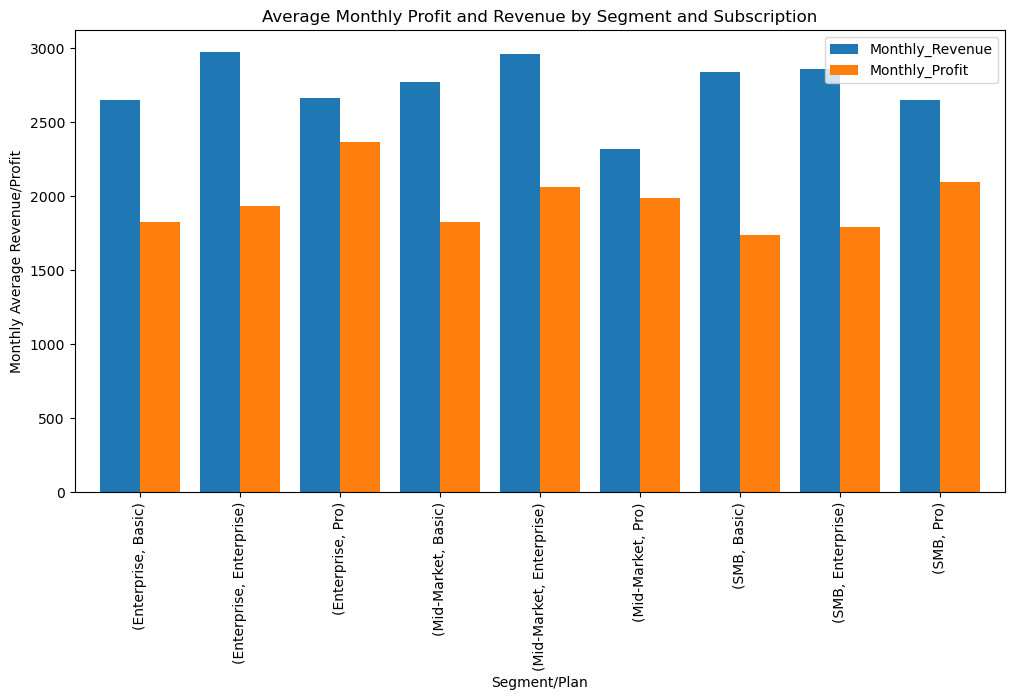

In [70]:
df2.plot(kind="bar", figsize=(12,6), width=0.8)
plt.title("Average Monthly Profit and Revenue by Segment and Subscription")
plt.xlabel("Segment/Plan")
plt.ylabel("Monthly Average Revenue/Profit")
plt.show()

In [106]:
df3 = df.groupby(["Customer_Segment", "Region"])[["Customer_Satisfaction"]].mean()
display(df3)

Customer_Satisfaction
Customer_Segment Region                              
Enterprise       Africa                      2.692774
                 Asia                        3.052651
                 Europe                      2.710549
                 North America               3.118143
                 South America               3.327771
Mid-Market       Africa                      3.050457
                 Asia                        3.336850
                 Europe                      2.562588
                 North America               2.784810
                 South America               3.177215
SMB              Africa                      2.859871
                 Asia                        3.009590
                 Europe                      3.132032
                 North America               2.965694
                 South America               3.708439

In [132]:
cs_cs_sp = df.groupby(["Customer_Segment", "Subscription_Plan"])["Customer_Satisfaction"].mean().unstack()
display(cs_cs_sp)

Subscription_Plan,Basic,Enterprise,Pro
Customer_Segment,,,
Enterprise,3.092460,2.787154,3.134494
Mid-Market,3.005820,2.800378,3.048199
SMB,3.226186,3.007275,3.139607


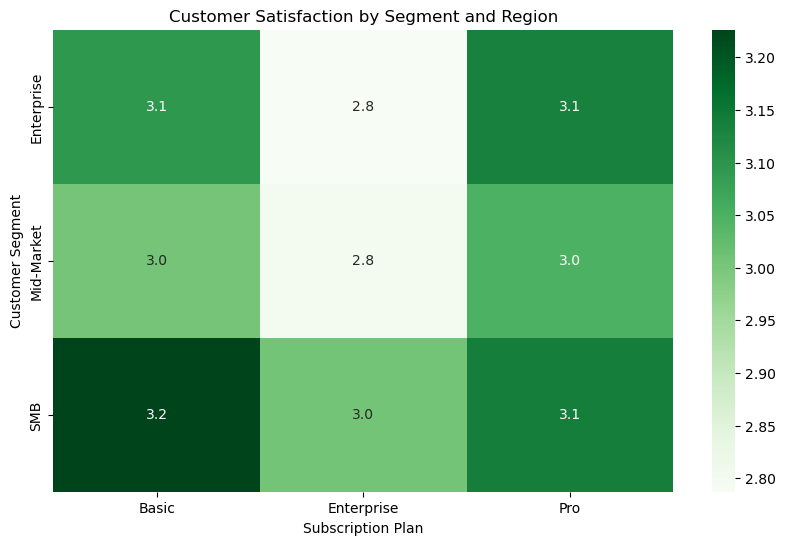

In [138]:
plt.figure(figsize=(10,6))
sns.heatmap(cs_cs_sp, annot=True, cmap="Greens", fmt=".1f")
plt.title("Customer Satisfaction by Segment and Region")
plt.xlabel("Subscription Plan")
plt.ylabel("Customer Segment")
plt.show()

In [144]:
sat_reg_sub = df.groupby(["Region", "Subscription_Plan"])["Customer_Satisfaction"].mean().unstack()
display(sat_reg_sub)

Subscription_Plan,Basic,Enterprise,Pro
Region,,,
Africa,2.744585,2.728350,3.137773
Asia,3.073049,3.004018,3.210549
Europe,2.951810,2.693093,2.843882
North America,3.299082,2.475105,3.009376
South America,3.458509,3.338022,3.509376


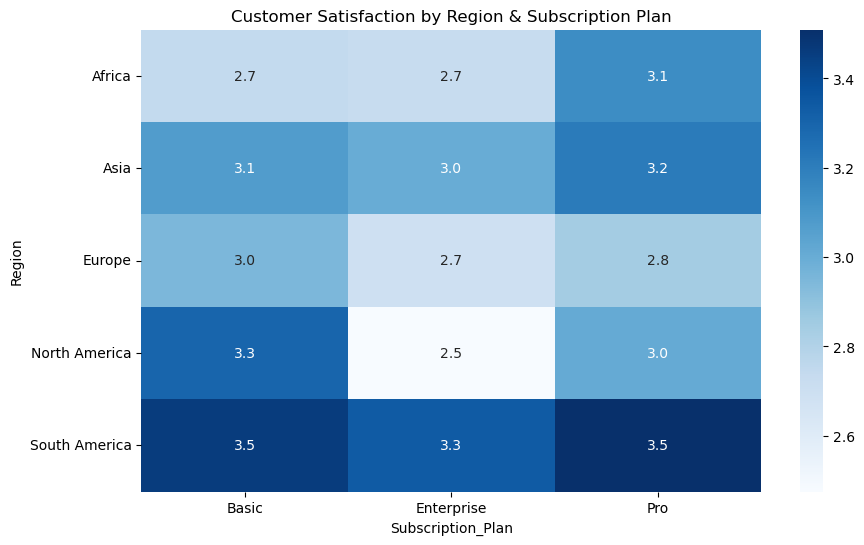

In [146]:
plt.figure(figsize=(10,6))
sns.heatmap(sat_reg_sub, annot=True, cmap="Blues", fmt=".1f")
plt.title("Customer Satisfaction by Region & Subscription Plan")
plt.xlabel=("Subcription Plan")
plt.ylabel=("Region")
plt.show()

In [148]:
customer_df = pd.read_csv("/Users/anastasia/Downloads/saas_customer_interactions.csv")
merged_df = pd.merge(df, customer_df, on="Customer_ID", how="inner")
merged_df.head()

,Customer_ID,Customer_Segment,Region,Subscription_Plan,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Engagement_Level,Account_Manager_x,Renewal_Status,Signup_Date,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Account_Manager_y
0,CUST0001,Enterprise,North America,Pro,4874.05,3307.52,1.0,165.0,Medium,Manager A,Churned,2021-08-05,Upsell Meeting,2023-10-26,Yes,NaN,Manager A
1,CUST0001,Enterprise,North America,Pro,4874.05,3307.52,1.0,165.0,Medium,Manager A,Churned,2021-08-05,Support Call,2023-07-24,No,1.0,Manager C
2,CUST0006,SMB,Africa,Enterprise,2505.31,504.92,4.0,179.0,Medium,Manager A,Churned,2021-11-16,Product Demo,2023-12-28,Yes,NaN,Manager D
3,CUST0010,SMB,Europe,Pro,2258.30,3447.56,3.0,35.0,High,Manager C,Churned,2021-10-01,Support Call,2023-04-02,No,4.0,Manager B
4,CUST0011,Enterprise,South America,Pro,1003.38,2910.66,3.0,17.0,Low,Manager C,Renewed,2021-04-10,Renewal Meeting,2023-11-01,No,3.0,Manager C


In [154]:
churned_df = merged_df[merged_df["Renewal_Status"] == "Churned"]
display(churned_df)

,Customer_ID,Customer_Segment,Region,Subscription_Plan,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Engagement_Level,Account_Manager_x,Renewal_Status,Signup_Date,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Account_Manager_y
0,CUST0001,Enterprise,North America,Pro,4874.05,3307.52,1.000000,165.0,Medium,Manager A,Churned,2021-08-05,Upsell Meeting,2023-10-26,Yes,NaN,Manager A
1,CUST0001,Enterprise,North America,Pro,4874.05,3307.52,1.000000,165.0,Medium,Manager A,Churned,2021-08-05,Support Call,2023-07-24,No,1.0,Manager C
2,CUST0006,SMB,Africa,Enterprise,2505.31,504.92,4.000000,179.0,Medium,Manager A,Churned,2021-11-16,Product Demo,2023-12-28,Yes,NaN,Manager D
3,CUST0010,SMB,Europe,Pro,2258.30,3447.56,3.000000,35.0,High,Manager C,Churned,2021-10-01,Support Call,2023-04-02,No,4.0,Manager B
6,CUST0014,SMB,Europe,Enterprise,2440.87,3228.12,1.000000,118.0,Medium,Manager B,Churned,2021-05-06,Renewal Meeting,2023-12-14,No,5.0,Manager D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,CUST0270,SMB,Europe,Enterprise,3071.39,2066.41,5.000000,54.0,Medium,Manager A,Churned,2021-03-23,QBR,2023-10-04,Yes,2.0,Manager D
132,CUST0272,SMB,Africa,Pro,4530.36,2064.31,5.000000,147.0,Medium,Manager A,Churned,2021-01-08,QBR,2023-06-27,Yes,5.0,Manager D
134,CUST0278,Mid-Market,South America,Basic,3142.37,983.26,1.000000,161.0,Low,Manager A,Churned,2021-03-21,Product Demo,2023-07-02,Yes,NaN,Manager A
139,CUST0289,SMB,South America,Basic,3688.56,1823.18,3.042194,19.0,Low,Manager A,Churned,2021-05-08,Upsell Meeting,2023-09-12,Yes,2.0,Manager D


In [164]:
churned_summary = churned_df.groupby(["Region", "Customer_Segment"]).size()
churned_summary = churned_summary.unstack()
display(churned_summary)

Customer_Segment,Enterprise,Mid-Market,SMB
Region,,,
Africa,2,5,5
Asia,10,1,7
Europe,2,4,13
North America,4,6,8
South America,4,3,3


In [178]:
customers_by_region = merged_df.groupby("Region")["Customer_ID"].nunique()
customers_by_region.head()
# Occurs to me now that the previous few cells are kind of useless. Multiple interactions are increasing the churn numbers.
# We'll need to first dedupe and then we'll have more accurate numbers to play with

Region
Africa           19
Asia             20
Europe           27
North America    21
South America    24
Name: Customer_ID, dtype: int64

In [188]:
unique_customers = merged_df.drop_duplicates(subset="Customer_ID", keep="last")
unique_customers.head()

,Customer_ID,Customer_Segment,Region,Subscription_Plan,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Engagement_Level,Account_Manager_x,Renewal_Status,Signup_Date,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Account_Manager_y
1,CUST0001,Enterprise,North America,Pro,4874.05,3307.52,1.0,165.0,Medium,Manager A,Churned,2021-08-05,Support Call,2023-07-24,No,1.0,Manager C
2,CUST0006,SMB,Africa,Enterprise,2505.31,504.92,4.0,179.0,Medium,Manager A,Churned,2021-11-16,Product Demo,2023-12-28,Yes,NaN,Manager D
3,CUST0010,SMB,Europe,Pro,2258.30,3447.56,3.0,35.0,High,Manager C,Churned,2021-10-01,Support Call,2023-04-02,No,4.0,Manager B
4,CUST0011,Enterprise,South America,Pro,1003.38,2910.66,3.0,17.0,Low,Manager C,Renewed,2021-04-10,Renewal Meeting,2023-11-01,No,3.0,Manager C
5,CUST0012,Enterprise,South America,Pro,351.75,3920.77,1.0,184.0,Medium,Manager D,Renewed,2021-01-09,Support Call,2023-05-07,No,2.0,Manager D


In [190]:
churn_customers_df = unique_customers[unique_customers["Renewal_Status"] == "Churned"]
display(churn_customers_df.head())

,Customer_ID,Customer_Segment,Region,Subscription_Plan,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Engagement_Level,Account_Manager_x,Renewal_Status,Signup_Date,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Account_Manager_y
1,CUST0001,Enterprise,North America,Pro,4874.05,3307.52,1.0,165.0,Medium,Manager A,Churned,2021-08-05,Support Call,2023-07-24,No,1.0,Manager C
2,CUST0006,SMB,Africa,Enterprise,2505.31,504.92,4.0,179.0,Medium,Manager A,Churned,2021-11-16,Product Demo,2023-12-28,Yes,NaN,Manager D
3,CUST0010,SMB,Europe,Pro,2258.30,3447.56,3.0,35.0,High,Manager C,Churned,2021-10-01,Support Call,2023-04-02,No,4.0,Manager B
6,CUST0014,SMB,Europe,Enterprise,2440.87,3228.12,1.0,118.0,Medium,Manager B,Churned,2021-05-06,Renewal Meeting,2023-12-14,No,5.0,Manager D
7,CUST0015,Enterprise,South America,Pro,4128.37,1494.81,5.0,10.0,Low,Manager D,Churned,2021-08-19,Renewal Meeting,2023-10-15,No,5.0,Manager C


In [196]:
churned_summary = churn_customers_df.groupby(["Region", "Customer_Segment"]).size().unstack()
display(churned_summary)

Customer_Segment,Enterprise,Mid-Market,SMB
Region,,,
Africa,2,4,5
Asia,6,1,6
Europe,2,4,9
North America,2,5,6
South America,4,2,2


In [200]:
numeric_churn_data = churn_customers_df.select_dtypes(include=[np.number])
display(numeric_churn_data)

,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Followup_CSAT_Score
1,4874.05,3307.52,1.000000,165.0,1.0
2,2505.31,504.92,4.000000,179.0,NaN
3,2258.30,3447.56,3.000000,35.0,4.0
6,2440.87,3228.12,1.000000,118.0,5.0
7,4128.37,1494.81,5.000000,10.0,5.0
9,2063.47,3173.19,5.000000,76.0,2.0
10,463.00,104.98,5.000000,52.0,1.0
14,2660.61,2267.56,5.000000,193.0,NaN
15,2307.52,3665.26,4.000000,166.0,4.0
19,1134.02,1995.87,3.042194,95.0,5.0


In [202]:
numeric_churn_data.corr()

# okay - my view here is that by removing renewals - we've lost the ability to meaningfully investigate the differences between 
# churned & renewed
# so we need to go back to the dataset and maybe set a binary code 1/0 for the status and draw our correlations from there.


,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Followup_CSAT_Score
Monthly_Revenue,1.000000,0.086478,-0.136104,-0.033132,0.248866
Monthly_Profit,0.086478,1.000000,-0.176037,0.064629,-0.037250
Customer_Satisfaction,-0.136104,-0.176037,1.000000,-0.070542,-0.049439
Active_Users,-0.033132,0.064629,-0.070542,1.000000,-0.339007
Followup_CSAT_Score,0.248866,-0.037250,-0.049439,-0.339007,1.000000


In [204]:
unique_customers.head()

,Customer_ID,Customer_Segment,Region,Subscription_Plan,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Engagement_Level,Account_Manager_x,Renewal_Status,Signup_Date,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Account_Manager_y
1,CUST0001,Enterprise,North America,Pro,4874.05,3307.52,1.0,165.0,Medium,Manager A,Churned,2021-08-05,Support Call,2023-07-24,No,1.0,Manager C
2,CUST0006,SMB,Africa,Enterprise,2505.31,504.92,4.0,179.0,Medium,Manager A,Churned,2021-11-16,Product Demo,2023-12-28,Yes,NaN,Manager D
3,CUST0010,SMB,Europe,Pro,2258.30,3447.56,3.0,35.0,High,Manager C,Churned,2021-10-01,Support Call,2023-04-02,No,4.0,Manager B
4,CUST0011,Enterprise,South America,Pro,1003.38,2910.66,3.0,17.0,Low,Manager C,Renewed,2021-04-10,Renewal Meeting,2023-11-01,No,3.0,Manager C
5,CUST0012,Enterprise,South America,Pro,351.75,3920.77,1.0,184.0,Medium,Manager D,Renewed,2021-01-09,Support Call,2023-05-07,No,2.0,Manager D


In [206]:
unique_customers["Is Churned"] = unique_customers["Renewal_Status"].apply(lambda x: 1 if x == "Renewed" else 0)
unique_customers.head()

/var/folders/68/p6tbj3yj42n58fkdzr4c1br00000gn/T/ipykernel_13638/3948701380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_customers["Is Churned"] = unique_customers["Renewal_Status"].apply(lambda x: 1 if x == "Renewed" else 0)


,Customer_ID,Customer_Segment,Region,Subscription_Plan,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Engagement_Level,Account_Manager_x,Renewal_Status,Signup_Date,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Account_Manager_y,Is Churned
1,CUST0001,Enterprise,North America,Pro,4874.05,3307.52,1.0,165.0,Medium,Manager A,Churned,2021-08-05,Support Call,2023-07-24,No,1.0,Manager C,0
2,CUST0006,SMB,Africa,Enterprise,2505.31,504.92,4.0,179.0,Medium,Manager A,Churned,2021-11-16,Product Demo,2023-12-28,Yes,NaN,Manager D,0
3,CUST0010,SMB,Europe,Pro,2258.30,3447.56,3.0,35.0,High,Manager C,Churned,2021-10-01,Support Call,2023-04-02,No,4.0,Manager B,0
4,CUST0011,Enterprise,South America,Pro,1003.38,2910.66,3.0,17.0,Low,Manager C,Renewed,2021-04-10,Renewal Meeting,2023-11-01,No,3.0,Manager C,1
5,CUST0012,Enterprise,South America,Pro,351.75,3920.77,1.0,184.0,Medium,Manager D,Renewed,2021-01-09,Support Call,2023-05-07,No,2.0,Manager D,1


In [218]:
churn_analysis = unique_customers.select_dtypes(include=[np.number])
display(churn_analysis)

,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Followup_CSAT_Score,Is Churned
1,4874.05,3307.52,1.000000,165.0,1.0,0
2,2505.31,504.92,4.000000,179.0,NaN,0
3,2258.30,3447.56,3.000000,35.0,4.0,0
4,1003.38,2910.66,3.000000,17.0,3.0,1
5,351.75,3920.77,1.000000,184.0,2.0,1
...,...,...,...,...,...,...
142,541.65,3700.41,3.042194,177.0,1.0,1
144,1546.04,2279.74,3.042194,16.0,NaN,1
145,747.58,3463.78,3.042194,107.0,4.0,1
146,2743.10,2527.51,3.000000,124.0,3.0,1


In [222]:
ca_corr = churn_analysis.corr()

<Axes: >

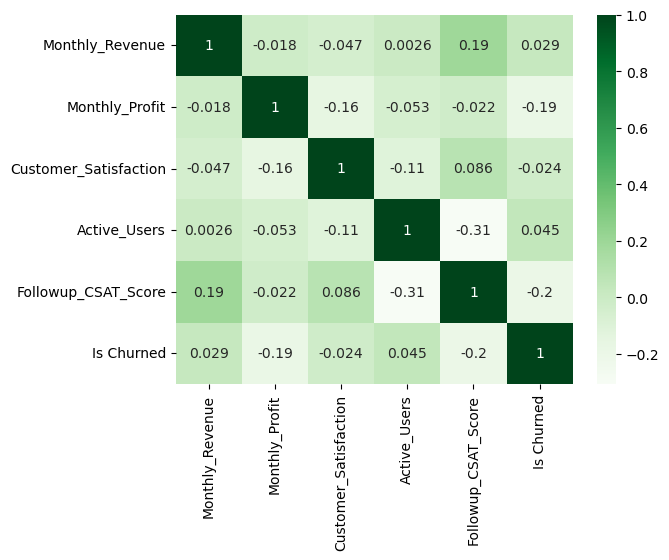

In [224]:
sns.heatmap(ca_corr, annot=True, cmap="Greens")